# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from geopy.geocoders import Nominatim
import time
from pprint import pprint
from sklearn import metrics

# CONFIGURATION OF LIBRARIES

In [2]:
pd.set_option("display.max_columns", None)

InteractiveShell.ast_node_interactivity = "all"

plt.figure(figsize=(14,8))

pd.options.display.max_rows = 100

pd.options.mode.chained_assignment = None  # default='warn'

<Figure size 1008x576 with 0 Axes>

# DATA READING DATA FROM SOURCE

Both datasets are stored in the same direcotry with script as csv files. 

In [3]:
dfPolicyData = pd.read_csv("PolicyData.csv", delimiter = ";", encoding='latin-1')
dfPolicyData.set_index("policy_guid", inplace = True)

dfInvoiceData = pd.read_csv("InvoiceData.csv", delimiter = ";")
dfInvoiceData.set_index("invoice_guid", inplace = True)


Premium and amount premium fields are not numberic. They are converted from object to float

In [4]:
dfInvoiceData["amount_premium"] = dfInvoiceData["amount_premium"].apply(lambda x: x.replace(',','.'), ).astype(float, errors = 'raise')
dfPolicyData["Premium"] = dfPolicyData["Premium"].apply(lambda x: x.replace(',','.'), ).astype(float, errors = 'raise')

In [5]:
dfPolicyData.head()

,Country,VehicleType,VehicleUsage,Power,Weight,VehicleFirstRegistrationYear,Mark,Model,Deductible_general,Fire,Theft,Natural_disasters,Road_assistance,Total_loss,Vandalism,Glass,Accident,Replacement_car,Gender,ClientBirthday,Region,BMClassMOD,Leasing,PolicyIssueDate,PolicyStartDate,PolicyEndDate,PolicyActualEndDate,Nb_of_payments,Premium,Channel,FuelType,avgFuelConsumption,DriveTrain,RenewalIndicator,IsRenewed,BalticRating,Terminated,sales_type
policy_guid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
{E4FD3CD8-4141-4E55-A74C-C983ED7EFD8E},EE,Passenger car,Regular,108,1895,2007,TOYOTA,AVENSIS,191.0,1,1,1,0,1,1,0,1,0,M,1983-10-19 00:00,HARJUMAA,0,0,2015-09-13 00:00,2015-09-13 00:00,2016-09-12 00:00,2016-05-24 00:00,12,261.09,Lean Operator,Gasoline,8.0,Front,0,0,3,1,Renewal
{CD63AD22-81C2-4A86-8E56-AF1084BE49E3},EE,Passenger car,Regular,120,2050,2008,VOLVO,S60,191.0,1,1,1,0,1,1,0,1,0,M,1959-08-11 00:00,PÄRNUMAA,0,0,2015-09-23 00:00,2015-09-23 00:00,2016-09-22 00:00,2015-10-22 00:00,12,297.22,Lean Operator,Diesel,7.0,Front,0,1,0,1,Renewal
{480DDB89-BA11-4219-A92C-330ABC6BE1EC},EE,Passenger car,Regular,125,1970,2012,VOLKSWAGEN,CC,191.0,1,1,1,1,1,1,1,1,0,M,1966-10-17 00:00,HARJUMAA,0,1,2015-09-14 00:00,2015-09-14 00:00,2016-09-13 00:00,2016-09-13 00:00,4,534.22,Direct,Diesel,5.0,Front,0,0,0,0,New sale
{74A1885E-CC4D-435B-B7CF-CAD0287FA814},EE,Passenger car,Regular,85,2510,2007,VOLKSWAGEN,SHARAN,191.0,1,1,1,1,1,1,1,1,0,M,1954-03-08 00:00,TARTUMAA,A1,0,2015-09-20 00:00,2015-09-20 00:00,2016-09-19 00:00,2015-10-04 00:00,12,275.24,Direct,Missing,NaN,Missing,0,1,5,1,New sale
{FF6D78C8-B660-4D58-8A9D-0FD6E32E2A03},EE,Passenger car,Regular,77,1780,2013,SKODA,OCTAVIA,191.0,1,0,1,1,1,1,1,1,0,M,1944-07-30 00:00,JÕGEVAMAA,0,0,2015-11-23 00:00,2015-11-23 00:00,2016-11-22 00:00,2016-04-22 00:00,12,239.77,Direct,Gasoline,NaN,Missing,0,0,2,1,New sale


In [6]:
dfInvoiceData.head()

,payment_status,policy_guid,amount_premium,due_date,paid_date
invoice_guid,,,,,
{55B3ABD8-B64E-498E-A617-3C6E88C4D06F},Paid,{480DDB89-BA11-4219-A92C-330ABC6BE1EC},133.55,2015-12-13 00:00,2015-12-14 00:00
{40544861-68D0-462F-AF9C-8740B2316620},Paid,{480DDB89-BA11-4219-A92C-330ABC6BE1EC},133.55,2016-03-13 00:00,2016-03-14 00:00
{B3C6B66F-280E-413B-8FEE-A804903D2FE8},Paid,{480DDB89-BA11-4219-A92C-330ABC6BE1EC},133.57,2015-09-14 00:00,2015-09-14 00:00
{674FDC26-D0E8-4C20-BB86-1AE9979EB1AA},Paid,{480DDB89-BA11-4219-A92C-330ABC6BE1EC},133.55,2016-06-13 00:00,2016-06-13 00:00
{EE21ECF7-7B70-4DA3-B663-87371073DE18},Paid,{74A1885E-CC4D-435B-B7CF-CAD0287FA814},23.01,2015-09-19 00:00,2015-09-21 00:00


# DATA PREPROCESSING

dfModelData that represents all the possible attributes for input and target features.

In [7]:
dfModelData = dfPolicyData.copy()

## Target Label Creations

Target labels that represent late payment of invoices of corresponding policy is generated based on following criteria:

Paid late at least once

Paid always on time

In [8]:
aConditions = [
    (dfInvoiceData["due_date"] < dfInvoiceData["paid_date"]),
    (dfInvoiceData["due_date"] >= dfInvoiceData["paid_date"])
]

dfInvoiceData["isInvoiceLatePaid"] = np.select(aConditions, [1, 0])

oInvocieGroupByPolicy = dfInvoiceData[["policy_guid", "isInvoiceLatePaid"]].groupby(["policy_guid"])

dfInvoiceIssueStatistics = oInvocieGroupByPolicy.agg(["sum"])

dfInvoiceIssueStatistics = dfInvoiceIssueStatistics["isInvoiceLatePaid"] 

dfInvoiceIssueStatistics.columns = ["number_of_late_payments"]

aLabels = ["Paid late at least once", "Paid always on time"]
aConditions = [
    (dfInvoiceIssueStatistics["number_of_late_payments"] >= 1),
    (dfInvoiceIssueStatistics["number_of_late_payments"] == 0)
]

dfTrgetLabels = pd.DataFrame(data = np.select(aConditions, aLabels), index = dfInvoiceIssueStatistics.index, columns = ["TARGET_LABEL"])

dfModelData = dfModelData.join(dfTrgetLabels,  on= "policy_guid")

In [9]:
dfModelData.head()

,Country,VehicleType,VehicleUsage,Power,Weight,VehicleFirstRegistrationYear,Mark,Model,Deductible_general,Fire,Theft,Natural_disasters,Road_assistance,Total_loss,Vandalism,Glass,Accident,Replacement_car,Gender,ClientBirthday,Region,BMClassMOD,Leasing,PolicyIssueDate,PolicyStartDate,PolicyEndDate,PolicyActualEndDate,Nb_of_payments,Premium,Channel,FuelType,avgFuelConsumption,DriveTrain,RenewalIndicator,IsRenewed,BalticRating,Terminated,sales_type,TARGET_LABEL
policy_guid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
{E4FD3CD8-4141-4E55-A74C-C983ED7EFD8E},EE,Passenger car,Regular,108,1895,2007,TOYOTA,AVENSIS,191.0,1,1,1,0,1,1,0,1,0,M,1983-10-19 00:00,HARJUMAA,0,0,2015-09-13 00:00,2015-09-13 00:00,2016-09-12 00:00,2016-05-24 00:00,12,261.09,Lean Operator,Gasoline,8.0,Front,0,0,3,1,Renewal,Paid late at least once
{CD63AD22-81C2-4A86-8E56-AF1084BE49E3},EE,Passenger car,Regular,120,2050,2008,VOLVO,S60,191.0,1,1,1,0,1,1,0,1,0,M,1959-08-11 00:00,PÄRNUMAA,0,0,2015-09-23 00:00,2015-09-23 00:00,2016-09-22 00:00,2015-10-22 00:00,12,297.22,Lean Operator,Diesel,7.0,Front,0,1,0,1,Renewal,Paid always on time
{480DDB89-BA11-4219-A92C-330ABC6BE1EC},EE,Passenger car,Regular,125,1970,2012,VOLKSWAGEN,CC,191.0,1,1,1,1,1,1,1,1,0,M,1966-10-17 00:00,HARJUMAA,0,1,2015-09-14 00:00,2015-09-14 00:00,2016-09-13 00:00,2016-09-13 00:00,4,534.22,Direct,Diesel,5.0,Front,0,0,0,0,New sale,Paid late at least once
{74A1885E-CC4D-435B-B7CF-CAD0287FA814},EE,Passenger car,Regular,85,2510,2007,VOLKSWAGEN,SHARAN,191.0,1,1,1,1,1,1,1,1,0,M,1954-03-08 00:00,TARTUMAA,A1,0,2015-09-20 00:00,2015-09-20 00:00,2016-09-19 00:00,2015-10-04 00:00,12,275.24,Direct,Missing,NaN,Missing,0,1,5,1,New sale,Paid late at least once
{FF6D78C8-B660-4D58-8A9D-0FD6E32E2A03},EE,Passenger car,Regular,77,1780,2013,SKODA,OCTAVIA,191.0,1,0,1,1,1,1,1,1,0,M,1944-07-30 00:00,JÕGEVAMAA,0,0,2015-11-23 00:00,2015-11-23 00:00,2016-11-22 00:00,2016-04-22 00:00,12,239.77,Direct,Gasoline,NaN,Missing,0,0,2,1,New sale,Paid always on time


# MISSING DATA INPUTATION

In [10]:
# Columns that are NaN or 'Missing' in policy dataset

dfPolicyData.columns[dfPolicyData.isna().any()].tolist()

dfMissing = dfPolicyData.astype(str) == "Missing"
dfPolicyData.columns[dfMissing.any()].tolist()


['Deductible_general', 'ClientBirthday', 'BMClassMOD', 'avgFuelConsumption']

['Region', 'FuelType', 'DriveTrain']

In [11]:
# Columns that are NaN or 'Missing' in invoice dataset.
# There is no missing data invoice dataset. 

dfInvoiceData.columns[dfInvoiceData.isna().any()].tolist()

dfMissing = dfInvoiceData.astype(str) == "Missing"
dfInvoiceData.columns[dfMissing.any()].tolist()

[]

[]

## Deductible_general

There are only 2 rows where Deductible_general is missing. 

Since they are relatively small amount of rows for this dataset, these rows are deleted.

In [12]:
dfMissingDecutibleGeneral = dfModelData[dfModelData["Deductible_general"].isna()]
dfModelData.drop(dfMissingDecutibleGeneral.index, inplace = True)

## ClientBirthday

There are only 43 rows where ClientBirthday is missing.

Since they are relatively small amount of rows for this dataset, these rows are deleted.

In [13]:
dfMissingClientBirthday = dfModelData[dfModelData["ClientBirthday"].isna()]
dfModelData.drop(dfMissingClientBirthday.index, inplace = True)

## BMClassMOD

There are only 14 rows where BMClassMOD is missing.

Since they are relatively small amount of rows for this dataset, these rows are deleted.

In [14]:
dfMissingBmClassMod = dfModelData[dfModelData["BMClassMOD"].isna()]
dfModelData.drop(dfMissingBmClassMod.index, inplace = True)

## avgFuelConsumption

There are 27927 rows where avgFuelConsumption is missing.

Since it s a big amount of rows, correlation between avgFuelConsumption and other fields are calculated for non-missing data.

It is found out that avgFuelConsumption has fair linear correlation with the attributes of Power, Weight,  VehicleFirstRegistrationYear and Premium.

Missing data is filled based on random forest classifier model since avgFuelConsumption field contains cardinal-categorical data.

In [15]:
dfMissingAvgFuelConsumption = dfModelData[dfModelData["avgFuelConsumption"].isna()]
dfNonMissingAvgFuelConsumption = dfModelData.drop(dfMissingAvgFuelConsumption.index, inplace = False)

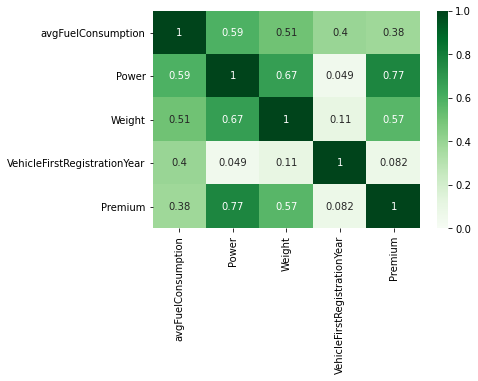

In [16]:
aUniqueAvgFuelConsumption = dfNonMissingAvgFuelConsumption["avgFuelConsumption"].unique()


dfAvgFuelConsumptionClassified = pd.get_dummies(dfNonMissingAvgFuelConsumption["avgFuelConsumption"])
dfNonMissingAvgFuelConsumption[aUniqueAvgFuelConsumption] = dfAvgFuelConsumptionClassified

dfCorr = dfNonMissingAvgFuelConsumption[["avgFuelConsumption", "Power", "Weight", "VehicleFirstRegistrationYear", "Premium"]].corr()

sns.heatmap(dfCorr.abs(), vmin=0, vmax=1, annot = True, cmap="Greens")

In [17]:
dfX = dfNonMissingAvgFuelConsumption[["Power", "Weight", "VehicleFirstRegistrationYear", "Premium"]]
dfY = dfNonMissingAvgFuelConsumption[aUniqueAvgFuelConsumption]

X_train, X_test, y_train, y_test = train_test_split(dfX, dfY, test_size=0.3, random_state=1)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

oRandForModel = RandomForestClassifier()
oRandForModel.fit(X_train, y_train)

y_pred = oRandForModel.predict(X_test)

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

print('Recall: ', metrics.recall_score(y_test, y_pred,zero_division=0,  average = 'micro'))

print('Precision: ', metrics.precision_score(y_test, y_pred,zero_division=0,  average = 'micro'))

print('F1-Score: ', metrics.f1_score(y_test, y_pred,zero_division=0,  average = 'micro'))

aPredictedClassesForMissing = oRandForModel.predict(dfMissingAvgFuelConsumption[["Power", "Weight", "VehicleFirstRegistrationYear", "Premium"]])

dfPredictedClassesForMissing = pd.DataFrame(data = aPredictedClassesForMissing ,  columns = aUniqueAvgFuelConsumption, index = dfMissingAvgFuelConsumption.index )

sPredictedLabels = dfPredictedClassesForMissing.idxmax(axis=1)

dfModelData["avgFuelConsumption"].fillna(sPredictedLabels, inplace = True)

RandomForestClassifier()

Accuracy:  0.8766808789767137
Recall:  0.8766808789767137
Precision:  0.9272396149510016
F1-Score:  0.9012517385257302


## Region

There are 6727 rows (aprx. 9% of whole dataset).

According to given attributes, it is difficult to build a pattern that can help to predict region.

Regional data may give information about person's financial information. That's why, this attribue is kept in model data but missing rows have been removed from dataset.

In [18]:
dfPolicyDataWithMissingRegion = dfModelData[dfModelData["Region"] == "Missing"]
dfModelData.drop(dfPolicyDataWithMissingRegion.index, inplace = True)

## Fuel Type

For missing fuel types, we can use policy dataset as a "vehicle" dataset where we can build a classification model to identify fuel type. Logically, fuel type is related with vehicle attributes related features such as 'VehicleType', 'VehicleUsage', 'Power', 'Weight','VehicleFirstRegistrationYear', 'Mark', 'Model'

In [19]:
def ReplaceMissingDataWithClassifier(dfModelData, aCategoricalFeatures, aContinuousFeatures, sTargetFeature):

    dfModelDataCopy = dfModelData.copy()
    
    aFeaturesX = []
    
    for i in range(len(aCategoricalFeatures)):
        sCategoricalFeature = aCategoricalFeatures[i]

        # to avoid "other" value for multiple attributes
        dfTemp = dfModelDataCopy[dfModelDataCopy[sCategoricalFeature] == "OTHER"]
        dfTemp[sCategoricalFeature] = "Other_" + str(sCategoricalFeature)
        
        dfModelDataCopy[dfModelDataCopy[sCategoricalFeature] == "OTHER"] = dfTemp
        
        dfCategoricalFeatureClassified = pd.get_dummies(dfModelDataCopy[sCategoricalFeature])
        
        dfModelDataCopy = dfModelDataCopy.join(dfCategoricalFeatureClassified, on= "policy_guid")
        
        aFeaturesX = np.concatenate([aFeaturesX, dfCategoricalFeatureClassified.columns])
 
        
    aFeaturesX = np.concatenate([aFeaturesX, aContinuousFeatures])

    dfTargetFeatureClassified= pd.get_dummies(dfModelDataCopy[sTargetFeature])
    
    dfModelDataCopy = dfModelDataCopy.join(dfTargetFeatureClassified, on= "policy_guid")

    aFeaturesY = np.delete(dfTargetFeatureClassified.columns, np.where(dfTargetFeatureClassified.columns == "Missing") )

    dfMissingData = dfModelDataCopy[dfModelData[sTargetFeature] == "Missing"]
    dfNonMissingData = dfModelDataCopy.drop(dfMissingData.index, inplace = False)
    
    dfX = dfNonMissingData[aFeaturesX]
    dfY = dfNonMissingData[aFeaturesY]

    X_train, X_test, y_train, y_test = train_test_split(dfX, dfY, test_size=0.3, random_state=1)

    oDecTreeModel =  DecisionTreeClassifier()
    oDecTreeModel.fit(X_train, y_train)

    y_pred = oDecTreeModel.predict(X_test)

    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

    print('Recall: ', metrics.recall_score(y_test, y_pred,zero_division=0,  average = 'micro'))

    print('Precision: ', metrics.precision_score(y_test, y_pred,zero_division=0,  average = 'micro'))

    print('F1-Score: ', metrics.f1_score(y_test, y_pred,zero_division=0,  average = 'micro'))
    
    dfX_Missing = dfMissingData[aFeaturesX]
    aPredictionsForMissing = oDecTreeModel.predict(dfX_Missing)
    dfPredictionsForMissing = pd.DataFrame(data = aPredictionsForMissing, columns = aFeaturesY, index = dfMissingData.index)
    
    aPredictedLabels = dfPredictionsForMissing.idxmax(axis=1)

    dfModelData.loc[dfMissingData.index,sTargetFeature] = aPredictedLabels

In [20]:
ReplaceMissingDataWithClassifier(dfModelData, 
                                ['VehicleType', 'VehicleUsage', 'Mark', 'Model'], 
                                ['Power', 'Weight','VehicleFirstRegistrationYear'], 
                                'FuelType')

Accuracy:  0.9878638049219013
Recall:  0.9878638049219013
Precision:  0.9878638049219013
F1-Score:  0.9878638049219013


## DriveTrain

There are 22558 rows that have missing information for this field. Since it s a around 36% of whole data and 'DriveTrain' depends on vehicle attributes, we can replace missing data with a classifier.

In [21]:
ReplaceMissingDataWithClassifier(dfModelData, 
                                ['VehicleType', 'VehicleUsage', 'Mark', 'Model'], 
                                ['Power', 'Weight','VehicleFirstRegistrationYear'], 
                                'DriveTrain')

Accuracy:  0.9885486470438545
Recall:  0.9885486470438545
Precision:  0.9891359701239179
F1-Score:  0.9888422213737219


# FEATURE SELECTION

"One-Hot Encoding" is applied when:

The categorical feature is not ordinal.
The number of categorical features is less so one-hot encoding can be effectively applied

"Label Encoding" is applied when:

The categorical feature is ordinal.
The number of categories is quite large as one-hot encoding can lead to high memory consumption

source: 

https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/

https://datascience.stackexchange.com/questions/9443/when-to-use-one-hot-encoding-vs-labelencoder-vs-dictvectorizor

In [22]:
def aCreateOneHotEncoding(dfModelData, sCategoricalFeature):
    
    dfTemp = dfModelData[dfModelData[sCategoricalFeature] == "OTHER"]
    dfTemp[sCategoricalFeature] = "Other_" + str(sCategoricalFeature)
    
    dfModelData[dfModelData[sCategoricalFeature] == "OTHER"] = dfTemp
    
    aUniqueValues = dfModelData[sCategoricalFeature].unique()
    
    dfFeatureClassified = pd.get_dummies(dfModelData[sCategoricalFeature])

    dfModelData = dfModelData.join(dfFeatureClassified, on= "policy_guid")

    dfModelData.drop([sCategoricalFeature], axis = 1 , inplace = True)

    return aUniqueValues, dfModelData
    

In [23]:
def aCreateLabelEncoding(dfModelData, sCategoricalFeature):

    oLabelEncoder = LabelEncoder()

    oLabelEncoder.fit(dfModelData[sCategoricalFeature])

    dfModelData[sCategoricalFeature] = oLabelEncoder.transform(dfModelData[sCategoricalFeature])
    
    return oLabelEncoder.classes_, dfModelData
    

## TARGET_LABEL

In [24]:
aTargetLabels, dfModelData = aCreateOneHotEncoding(dfModelData, "TARGET_LABEL")

## Country

"Country" field is same in whole dataset. It is not considered in model dataset.

In [25]:
dfModelData["Country"].value_counts()

EE    61852
Name: Country, dtype: int64

In [26]:
dfModelData.drop(["Country"], axis = 1 , inplace = True)

## VehicleType

By logical judgement, "VehicleType" can be explained by "Weight" and maybe "Mark" and "Model" of vehicle. That's why, this variable is excluded.

In [27]:
dfModelData.drop("VehicleType", axis = 1 , inplace = True)

## VehicleUsage

In [28]:
aVehicleUsages, dfModelData = aCreateOneHotEncoding(dfModelData, "VehicleUsage")

## Mark

In [29]:
aMarks, dfModelData = aCreateOneHotEncoding(dfModelData, "Mark")

## Model

In [30]:
aModels, dfModelData = aCreateOneHotEncoding(dfModelData, "Model")

## Region

Region information is converted into geographical coordinates.

In [31]:
# instantiate a new Nominatim client
aUniqueRegions = dfModelData["Region"].unique()
dfRegionsWithCoordinates = pd.DataFrame(index = aUniqueRegions, columns = ["latitude", "longitude"])

oGeolocator = Nominatim(user_agent="tutorial")

for i in range(len(aUniqueRegions)):
    sRegion = aUniqueRegions[i]
    
    oLocation = oGeolocator.geocode(sRegion)
    fLatitue = oLocation.latitude
    fLongitude = oLocation.longitude


    dfRegionsWithCoordinates.loc[sRegion, "latitude"] = fLatitue
    dfRegionsWithCoordinates.loc[sRegion, "longitude"] = fLongitude

dfRegionsWithCoordinates.index.name = "Region"
dfRegionsWithCoordinates.reset_index(level=0, inplace=True)

In [32]:
dfRegionsWithCoordinates

,Region,latitude,longitude
0,HARJUMAA,59.4091,24.7369
1,PÄRNUMAA,58.3195,24.3026
2,TARTUMAA,58.4075,26.7347
3,JÕGEVAMAA,58.771,26.5686
4,IDA-VIRUMAA,59.2093,27.413
5,LÄÄNE-VIRUMAA,59.4076,26.3099
6,JÄRVAMAA,58.9381,25.7332
7,VÕRUMAA,57.8133,26.9848
8,RAPLAMAA,58.942,24.6984
9,VALGAMAA,57.8689,26.1049


In [33]:
dfModelData = pd.DataFrame(
    data = pd.merge(dfModelData,dfRegionsWithCoordinates, on='Region').values,
    index = dfModelData.index,
    columns = np.concatenate([dfModelData.columns, ['latitude', 'longitude']]))

dfModelData[['latitude', 'longitude']] = dfModelData[['latitude', 'longitude']].astype(float)

dfModelData.drop("Region", axis = 1 , inplace = True)

## Gender

In [34]:
aGenders, dfModelData = aCreateOneHotEncoding(dfModelData, "Gender")

## ClientBirthDay

Client age on policy start date is more relevant than client birthday since we are handling historical data.

In [35]:
dfModelData["ClientAgeOnPolicyStart"] = (pd.to_datetime(dfModelData["PolicyStartDate"])-pd.to_datetime(dfModelData["ClientBirthday"])).astype('<m8[Y]')
dfModelData.drop("ClientBirthday", axis = 1 , inplace = True)

## BMClassMOD

BM Class Mod looks like ordinal categorical data.

In [36]:
aBMClassMODs, dfModelData =  aCreateLabelEncoding(dfModelData, "BMClassMOD")

## PolicyIssueDate

By logical judgement, "PolicyIssueDate" is not related if a person pays late or not. 

In [37]:
dfModelData.drop("PolicyIssueDate", axis = 1 , inplace = True)

## PolicyStartDate

"PolicyStartDate" could be a reason of payment date. Especially day part of the date could be a reason. Maybe persons prefer to pay after their salary. 

This field is converted to following fields: 

1. year, month and day.

2. In addition, expected duration of policies are calculated based on difference between start and end date.

3. Vehicle age on PolicyStartDate

Since this fied is date time field it is removed from model dataset.

In [38]:
dfModelData["PolicyStartYear"] = pd.DatetimeIndex(dfModelData["PolicyStartDate"]).year

dfModelData["PolicyStartMonth"] = pd.DatetimeIndex(dfModelData["PolicyStartDate"]).month

dfModelData["PolicyStartDay"] = pd.DatetimeIndex(dfModelData["PolicyStartDate"]).day

In [39]:
dfModelData["PolicyDurationInMonths"] = (pd.to_datetime(dfModelData["PolicyEndDate"])-pd.to_datetime(dfModelData["PolicyStartDate"])).astype('<m8[M]')

In [40]:
dfModelData["VehicleAgeOnPolicyStart"] = dfModelData["PolicyStartYear"]-dfModelData["VehicleFirstRegistrationYear"]


In [41]:
dfModelData.drop("PolicyStartDate", axis = 1 , inplace = True)

## PolicyEndDate

Newly created "PolicyDurationInMonths" attribute would cover "PolicyEndDate" attribute. That's why, it is removed from model dataset

In [42]:
dfModelData.drop("PolicyEndDate", axis = 1 , inplace = True)

## PolicyActualEndDate

"PolicyActualEndDate" attribute doesn't have a meanining since the prediction algorithm will be running on current time when policy is still active. That's why "PolicyActualEndDate" is removed from model dataset.

In [43]:
dfModelData.drop("PolicyActualEndDate", axis = 1 , inplace = True)

## Channel

Channel may be related with the payment operation as well. It could be so that electronic channels may have more stable payment routine. It is observed that direct and unknown payments have highest late payment rates.

In [44]:
dfChannelStats = dfModelData[["Channel", "Paid late at least once"]].groupby(["Channel"]).agg(["sum", "count"])

dfChannelStats = dfChannelStats["Paid late at least once"]

dfChannelStats = pd.DataFrame(data = dfChannelStats.values , index  = dfChannelStats.index, columns=["policies paid late", "number of policies"])

dfChannelStats.reset_index(inplace = True)

dfChannelStats["policies paid on time"] = dfChannelStats["number of policies"]-dfChannelStats["policies paid late"]

dfChannelStats["policies paid on time (%)"] = (dfChannelStats["policies paid on time"]/dfChannelStats["number of policies"])*100

dfChannelStats["policies paid late (%)"] = (dfChannelStats["policies paid late"]/dfChannelStats["number of policies"])*100

dfChannelStats

,Channel,policies paid late,number of policies,policies paid on time,policies paid on time (%),policies paid late (%)
0,Broker,1285,7789,6504,83.502375,16.497625
1,Direct,14559,35710,21151,59.229908,40.770092
2,Internet,4065,11622,7557,65.023232,34.976768
3,Lean Operator,673,1997,1324,66.299449,33.700551
4,Partner,1666,4700,3034,64.553191,35.446809
5,Unknown,15,34,19,55.882353,44.117647


In [45]:
aChannels, dfModelData = aCreateOneHotEncoding(dfModelData, "Channel")

## FuelType

In [46]:
aFuelTypes, dfModelData = aCreateOneHotEncoding(dfModelData, "FuelType")

## DriveTrain

In [47]:
aDriveTrains, dfModelData = aCreateOneHotEncoding(dfModelData, "DriveTrain")

## sales_type

In [48]:
aSalesTypes, dfModelData = aCreateOneHotEncoding(dfModelData, "sales_type")

Finally all data is in numerical format. 

In [77]:
dfModelData = dfModelData.astype(float)

dfModelData.head()

,Power,Weight,VehicleFirstRegistrationYear,Deductible_general,Fire,Theft,Natural_disasters,Road_assistance,Total_loss,Vandalism,Glass,Accident,Replacement_car,BMClassMOD,Leasing,Nb_of_payments,Premium,avgFuelConsumption,RenewalIndicator,IsRenewed,BalticRating,Terminated,Paid always on time,Paid late at least once,ATV,Agricultural Machinery,Dangerous Cargo,Forest Machinery,Operative Transport,Other,Regular,Remote Line,Short-term rental,Taxi,ALFA ROMEO,APRILIA,AUDI,BMW,BUELL,CADILLAC,CFMOTO,CHEVROLET,CHRYSLER,CITROEN,DACIA,DAF,DODGE,DUCATI,FENDT,FIAT,FORD,GMC,HARLEY-DAVIDS,HONDA,HUMMER,HYUNDAI,INFINITI,ISUZU,IVECO,JAGUAR,JEEP,JOHN DEERE,KAWASAKI,KIA,KTM,LADA,LANCIA,LAND ROVER,LEXUS,LINCOLN,MAN,MASSEY FERGUS,MAZDA,MERCEDES BENZ,MINI,MITSUBISHI,MOTO STAR,NEW HOLLAND,NISSAN,OPEL,Other_Mark,PEUGEOT,PORSCHE,RENAULT,ROVER,RSM,SAAB,SATURN,SCANIA,SCANIA IRIZAR,SEAT,SKODA,SSANGYONG,SUBARU,SUZUKI,TEMSA,TOYOTA,VALTRA,VAZ,VOLKSWAGEN,VOLVO,YAMAHA,101 VEKTOR,107,110,111,112,116,118,120,123,142 ACROS-540,159,2,2008,206,207,208,211,218,220,26,3,3008,300C,300M,301,306,307,308,313,315,316,318,320,323,325,328,330,335,35S13,370Z,4007,4008,406,407,420,5,500,5008,508,50C17,520,523,525,528,530,535,540,545,550,6,607,626,630,635,640,645,650,730,735,740,745,75,750,807,820 VARIO,9*3,9*5,9*7,911,9700,990 SUPERDUKE,A1,A140,A150,A160,A170,A180,A2,A200,A3,A4,A5,A6,A7,A8,ACCENT,ACCORD,ACTROS,ACTYON,ADAM,AGILA,ALBEA,ALHAMBRA,ALLROAD,ALMERA,ALMERA TINO,ALTEA,ALTO,AMAROK,AMPERA,ANTARA,AROSA,ARTEON,ASTRA,ASX,ATECA,ATEGO,ATEGO 818,ATS,AURIS,AVENGER,AVENSIS,AVEO,AVIATOR,AYGO,B-MAX,B150,B170,B180,B200,B9 TRIBECA,BALENO,BEETLE,BERLINGO,BIPPER,BLS,BORA,BOXER,BOXSTER,BRANSON 5025C,BRAVO,BRERA,BT-50,C-CROSSER,C-ELYSEE,C-HR,C-MAX,C1,C160,C180,C2,C200,C220,C230,C240,C250,C270,C280,C3,C30,C300,C320,C350,C4,C5,C6,C70,C8,CADDY,CALIBER,CAMARO,CAMRY,CANTER,CAPTIVA,CAPTUR,CARAVELLE,CARENS,CARINA,CARNIVAL,CAYENNE,CB 1000R,CB 500FA,CC,CEED,CELICA,CERATO,CHEROKEE,CITAN,CITIGO,CIVIC,CL500,CLA180,CLA200,CLA220,CLA250,CLIO,CLK200,CLK220,CLK240,CLK320,CLS250,CLS320,CLS350,CLS500,CLS55,COLT,COMBO,COMMANDER,COMPASS,COOPER,CORDOBA,COROLLA,COROLLA VERSO,CORSA,CORVETTE,COUPE,CR V,CR-Z,CRAFTER,CROMA,CROSSLAND X,CRUZE,CT200,CTS,CX3,CX5,CX7,CX9,D-MAX,DAILY,DAILY 50C15V (AVESTA,DEFENDER,DISCOVERY,DOBLO,DOKKER,DS3,DS5,DUCATO,DUSTER,E200,E220,E250,E270,E280,E300,E320,E350,E500,ECLIPSE,ECLIPSE CROSS,ECOSPORT,ELANTRA,EOS,EPICA,ER-6N,ESCALADE,ESPACE,EVANDA,EXEO,EXPERT,EXPERT TRAVELLER,EXPRESS,F-150,F-PACE,FABIA,FELICIA,FH,FH-440,FH-480,FH-480 6X2,FIESTA,FL,FL612,FLUENCE,FM,FM12,FOCUS,FORESTER,FR V,FR750Q,FREELANDER,FREEMONT,FRONTERA,FTS XF,FUSION,FZ6-S,G,G55,GALANT,GALAXY,GATOR XUV,GETZ,GIULIETTA,GL320,GL350,GL420,GL450,GL500,GLA250,GLC250,GLE350,GLE400,GLK200,GLK220,GLK250,GLK320,GLS350,GOLF,GRAND C-MAX,GRAND CHEROKEE,GRAND VITARA,GRAND VOYAGER,GRANDIS,GRANDLAND X,GS200,GS300,GS350,GS450,GT86,GX470,H1,H2,H3,HIACE,HILUX,HR V,I10,I20,I30,I40,IBIZA,IGNIS,IMPREZA,INSIGHT,INSIGNIA,INTERSTAR,IONIQ,IQ,IRIZAR K124 EB6X2NI,IS200,IS220,IS250,IS300,IX20,IX35,IX55,JAZZ,JETTA,JIMNY,JOICE,JOURNEY,JUKE,JUMPER,JUMPY,JUMPY SPACETOURER,JUSTY,K 400,KA,KADJAR,KALOS,KANGOO,KAROQ,KODIAQ,KOLEOS,KOMBI,KONA,KORANDO,KUGA,KYRON,L200,LACETTI,LAGUNA,LANCER,LAND CRUISER,LEAF,LEGACY,LEGEND,LEON,LEVORG,LIANA,LINEA,LODGY,LOGAN,LS430,LS460,LS600,LT-A700XK7,LT35,M3,M5,MACAN,MAGENTIS,MAGNUM,MALIBU,MASTER,MATRIX,MAVERICK,MAXIMA,MEGANE,MERIVA,MF 5465,MICRA,ML250,ML270,ML280,ML300,ML320,ML350,ML400,ML420,ML500,MODUS,MOKKA,MONDEO,MONTEREY,MOVANO,MPV,MR2,MULTIVAN,MURANO,NAVARA,NAVIGATOR,NC 700XD,NEMO,NEON,NIRO,NITRO,NIVA,NOTE,NUBIRA,NV200,NX200,NX300,OCTAVIA,OMEGA,ONE,OPIRUS,OPTIMA,ORLANDO,OUTBACK,OUTLANDER,Other_Model,P,PACIFICA,PAJERO,PANAMERA,PANDA,PARTNER,PASSAT,PATHFINDER,PATRIOT,PATROL,PHAETON,PICANTO,PICKUP,POLO,PRAKTIK,PREMACY,PREMIUM,PREVIA,PRIMASTAR,PRIMERA,PRIUS,PROACE,PT CRUISER,PULSAR,PUNTO,Q-BUS 31,Q3,Q5,Q7,QASHQAI,R,R 1200 GS,R 480 LA4X2MNA,R320,R350,R500,R8,RAM,RAM 2500,RAM 2500 PICK-UP,RANGE ROVER,RANGE ROVER EVOQUE,RANGE

## Variance Inflation Factor

A rule of thumb for interpreting the variance inflation factor:

1 = not correlated.
Between 1 and 5 = moderately correlated.
Greater than 5 = highly correlated.

Source:

https://www.investopedia.com/terms/v/variance-inflation-factor.asp

https://www.statisticshowto.com/variance-inflation-factor/

## Principle Component Analysis

# PREDICTIVE MODEL

In [80]:
aFeaturesX = dfModelData.drop(aTargetLabels, axis = 1, inplace = False).columns
aFeaturesY = aTargetLabels

dfX = dfModelData[aFeaturesX]

dfY = dfModelData[aFeaturesY]

X_train, X_test, y_train, y_test = train_test_split(dfX, dfY, test_size=0.3, random_state=1)

oDecTreeModel =  DecisionTreeClassifier()
oDecTreeModel.fit(X_train, y_train)

y_pred = oDecTreeModel.predict(X_test)

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

print('Recall: ', metrics.recall_score(y_test, y_pred,zero_division=0,  average = 'micro'))

print('Precision: ', metrics.precision_score(y_test, y_pred,zero_division=0,  average = 'micro'))

print('F1-Score: ', metrics.f1_score(y_test, y_pred,zero_division=0,  average = 'micro'))

DecisionTreeClassifier()

Accuracy:  0.6503017891787023
Recall:  0.6503017891787023
Precision:  0.6503017891787023
F1-Score:  0.6503017891787023
